In [21]:
import PIL.Image
import numpy as np
import torch

boxy_depth = PIL.Image.open("depth1.png").convert("RGB").resize((512, 512))

In [10]:
from loosecontrol import LooseControlNet

lcn = LooseControlNet("shariqfarooq/loose-control-3dbox").to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [19]:
boxy_depth.size

(512, 512)

  0%|          | 0/20 [00:00<?, ?it/s]

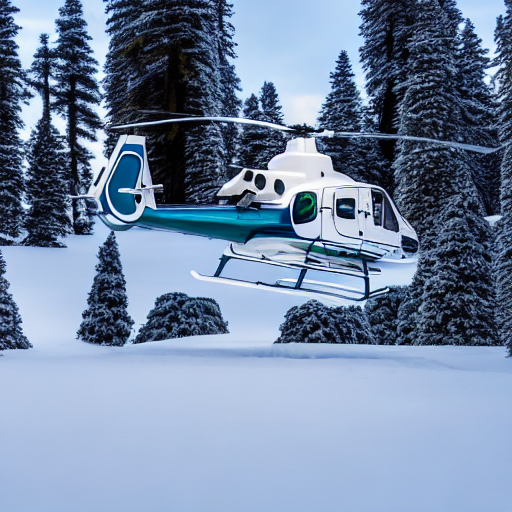

In [25]:
prompt = "A helicopter flying over a pine forest in winter"
negative_prompt = "blurry, text, caption, lowquality,lowresolution, low res, grainy, ugly"
with torch.cuda.amp.autocast():
    gen_image_1 = lcn(prompt, 
                      negative_prompt=negative_prompt, 
                      control_image=boxy_depth
                     )
gen_image_1

  0%|          | 0/20 [00:00<?, ?it/s]

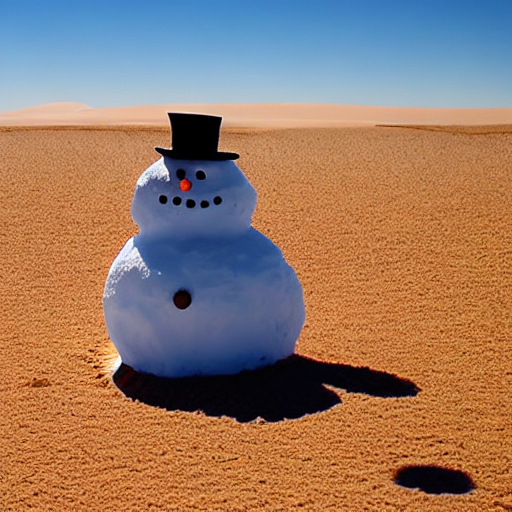

In [26]:
prompt = "A photo of a snowman in a desert"
negative_prompt = "blurry, text, caption, lowquality,lowresolution, low res, grainy, ugly"
with torch.cuda.amp.autocast():
    gen_image_1 = lcn(prompt, 
                      negative_prompt=negative_prompt, 
                      control_image=boxy_depth
                     )
gen_image_1

In [36]:
boxy_depth2 = PIL.Image.open("depth2.png").convert("L").resize((512, 512))

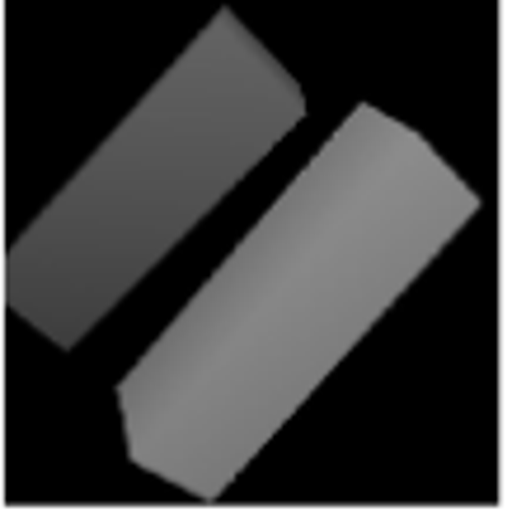

In [37]:
boxy_depth2

  0%|          | 0/20 [00:00<?, ?it/s]

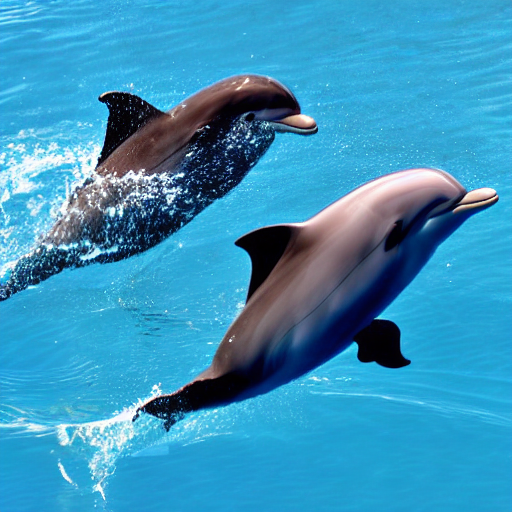

In [53]:
prompt = "Two dolphins swimming in water"

with torch.cuda.amp.autocast():
    gen_image_1 = lcn(prompt, 
                      negative_prompt=negative_prompt, 
                      control_image=boxy_depth2
                     )
gen_image_1

In [39]:
from diffusers import StableDiffusionPipeline, StableDiffusionControlNetPipeline, ControlNetModel

In [40]:
controlnet_model = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth")

vanilla_control = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet_model,
    equires_safety_checker=False,
    safety_checker=None,
    torch_dtype=torch.float16,
).to("cuda")

Keyword arguments {'equires_safety_checker': False} are not expected by StableDiffusionControlNetPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


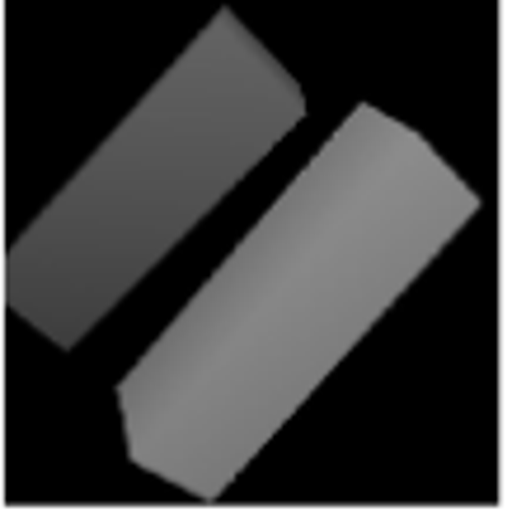

In [42]:
boxy_depth2

In [51]:
with torch.cuda.amp.autocast():
    vanilla_output = vanilla_control(
        prompt, 
        negative_prompt=negative_prompt, 
        image=boxy_depth2,
    )

  0%|          | 0/50 [00:00<?, ?it/s]

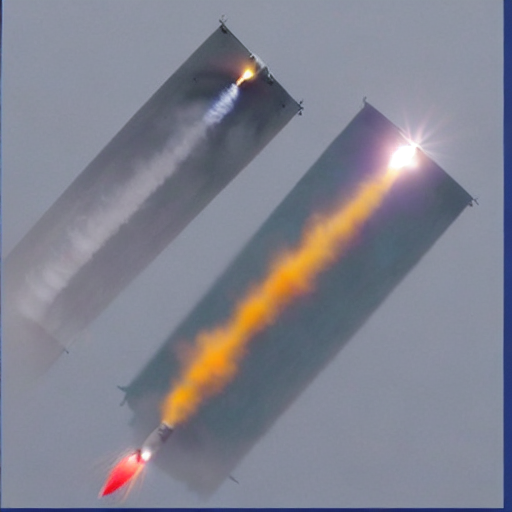

In [52]:
vanilla_output.images[0]